# Loan Project: Approval Prediction

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df_test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Visualization

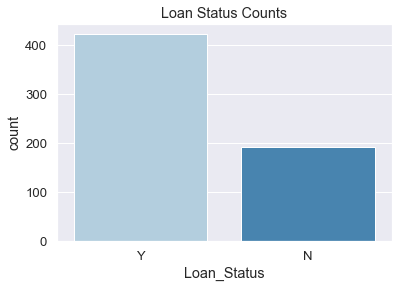

In [30]:
sns.countplot(df['Loan_Status'], palette='Blues')
plt.title("Loan Status Counts")
plt.show()

We have a slightly imbalanced dataset but not so much that we need to use a balancing technique on it.

In [23]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Let's take a look at categorical features and their loan acceptance rates

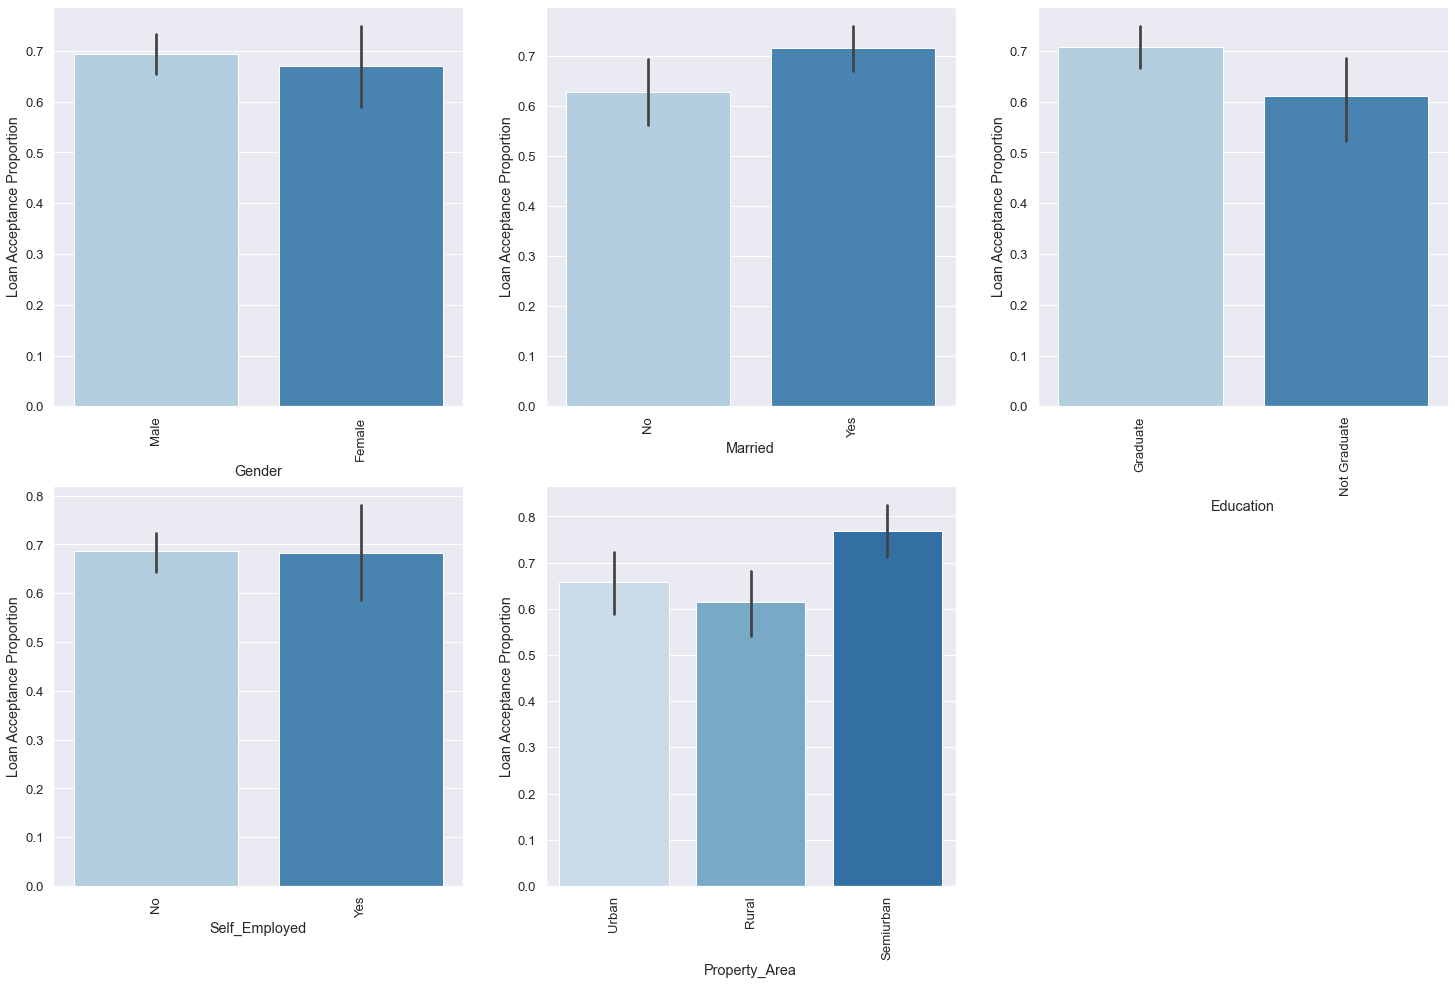

In [28]:
categorical_col = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

sns.set(font_scale=1.2)
plt.figure(figsize=(25,25))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y=df['Loan_Status'].astype("category").cat.codes, data=df, palette='Blues')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Loan Acceptance Proportion')
    plt.xlabel(f'{column}')

## Missing Values

In [9]:
# define a function to output number of missing values for each column of the data frame
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

In [46]:
display_missing(df)

Loan_ID column missing values: 0
Gender column missing values: 0
Married column missing values: 0
Dependents column missing values: 0
Education column missing values: 0
Self_Employed column missing values: 0
ApplicantIncome column missing values: 0
CoapplicantIncome column missing values: 0
LoanAmount column missing values: 0
Loan_Amount_Term column missing values: 14
Credit_History column missing values: 0
Property_Area column missing values: 0
Loan_Status column missing values: 0




#### Missing Value Imputation

**Handling of Missing Values**
- Self_employed: I am assuming that by leaving this unfilled, the applicant is not self-employed. Filling in with "No"
- Gender: This feature is impossible to compute. I could split 50/50, but I think I will just drop the records to avoid biasing the dataset.
- Married: Same as gender; drop null records
- Dependents: Replacing with 0
- LoanAmount: This seems like it could be integral in determining the Loan Status so missing records will be dropped
- Loan_Amount_Term: I will fill with the mode loan term
- Credit_History: Fill with 0

In [40]:
df['Self_Employed'].fillna("No", inplace=True)
df['Dependents'].fillna(0, inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode(), inplace=True)
df['Credit_History'].fillna(0, inplace=True)

In [52]:
mode_lat = df['Loan_Amount_Term'].mode()
mode_lat

0    360.0
dtype: float64

In [45]:
df['Gender'].dropna(inplace=True)
df['Married'].dropna(inplace=True)
df['LoanAmount'].dropna(inplace=True)